 <h1 align="center">Classifying EU Sustainability Performance</h1>

                                                (use the Table of Contents for navigation)

## Part 1. Data Exploration & Understanding

### 1.1. Loading and Data Wrangling
   

---
#### Description of the variables (methodology of the Europe Sustainable Development Report 2025)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_original = pd.read_csv("D:/Portfolio/Classifying EU Sustainability Performance/data/eu_sdg_performance_data.csv")

| Variable              | Description                                                    | Unit in dataset                                 |
| --------------------- | -------------------------------------------------------------- | ----------------------------------------------- |
| **year**              | Year of observation                                            | year (2015–2024)                                |
| **sdgi\_score**       | SDG Index (aggregate sustainability performance score)         | scale 0–100                                     |
| **performance\_tier** | Sustainability performance classification                      | 0 = Needs Improvement, 1 = Good, 2 = Leaders    |
| **sdg8\_income**      | Average income per capita (GDP per capita, PPP)                | € per person (≈ 8,800 – 39,000)                 |
| **sdg8\_unemp**       | Unemployment rate                                              | % of population (2 – 26%)                       |
| **sdg8\_inwork**      | Employment-to-population ratio                                 | % of population (3 – 19%)                       |
| **sdg9\_eurd**        | Expenditure on R\&D                                            | % of GDP (0 – 4%)                               |
| **sdg9\_digital**     | Basic digital skills of the population                         | % of population (28 – 83%)                      |
| **sdg9\_bband**       | Broadband internet coverage                                    | % of households (59 – 100%)                     |
| **sdg16\_cpi**        | Corruption Perception Index (Transparency International)       | scale 0–100 (34 – 91; higher = less corruption) |
| **sdg16\_rsf**        | Press Freedom Index (Reporters Without Borders)                | scale 0–100 (32 – 95; higher = freer press)     |
| **sdg16\_crime**      | Crime/Safety index                                             | normalized index 1–26 (lower = less crime)      |
| **sdg4\_tertiary**    | Population with tertiary education                             | % of adults (23 – 63%)                          |
| **sdg4\_adult**       | Adult participation in education/training                      | % of adults (1 – 39%)                           |
| **sdg7\_eurenew**     | Share of renewable energy in final energy consumption          | % (5 – 84%)                                     |
| **sdg13\_co2gcp**     | CO₂ emissions per capita                                       | tons CO₂ per person (≈ 3 – 16.6)                |
| **sdg5\_empgap**      | Gender employment gap                                          | % difference between men and women (0 – 43%)    |
| **sdg10\_gini**       | Gini coefficient (income inequality)                           | 21 – 45 (scale typical for Europe)              |


---
#### Distinct values of the variable Country

In [3]:
countries = sorted(df_original["Country"].unique())
for c in countries:
    print(repr(c)) 
print("\nNumber of unique values in column 'Country':", df_original["Country"].nunique())

'Austria'
'Baltic States'
'Belgium'
'Bulgaria'
'Candidate Countries'
'Central and Eastern Europe'
'Croatia'
'Cyprus'
'Czechia'
'Denmark'
'EFTA Countries'
'Estonia'
'European Union'
'Finland'
'France'
'Germany'
'Greece'
'Hungary'
'Iceland'
'Ireland'
'Italy'
'Latvia'
'Lithuania'
'Luxembourg'
'Malta'
'Netherlands'
'North Macedonia'
'Northern Europe'
'Norway'
'Poland'
'Portugal'
'Romania'
'Serbia'
'Slovak Republic'
'Slovenia'
'Southern Europe'
'Spain'
'Sweden'
'Switzerland'
'TŸrkiye'
'United Kingdom'
'Western Europe'

Number of unique values in column 'Country': 42


---
#### "All in the same pot" =) 


In the prepared dataset, the Country column contained a mix of individual countries (e.g., Germany, Poland, Romania) and regional aggregations/unions (European Union, Baltic States, Candidate Countries, etc.). There are only 42 unique values of the variable "Country", 8 of which are not individual countries but Europe Subregions.

<b>Potential problems:</b>
1. <b>"Inconsistent Granularity".</b> The dataset contains information at two different levels: individual countries (low aggregation) and regional groups (high aggregation). This inconsistency can distort the analysis, as the model would be trained on data with varying levels of granularity.
2. <b>Alignment with Project Goal.</b> The main project goal is to identify the factors that influence the distribution of individual European countries across three levels. Including aggregated data that describes Europe Subregions contradicts this objective. Removing this data ensures the model focuses exclusively on the relevant features.
3. <b>Bias.</b> European subregions reflect only average indicators for entire regions and do not account for the unique characteristics of individual countries. Their inclusion may introduce bias, since the model would be trained on aggregated data that do not correspond to the actual classification targets.

Removing Europe Subregions from the dataset makes model more understandable. This allows us to be confident that the conclusions we draw from the model (for example, identifying key factors influencing the classification) truly relate to individual countries and not to the averaged characteristics of entire Europe Subregions. This makes our results more reliable and meaningful for decision-making.

So, <b>~340 observations</b> (34 countries × 10 years)

In [4]:
regions_to_exclude = [
    'Baltic States',
    'Candidate Countries',
    'Central and Eastern Europe',
    'EFTA Countries',
    'European Union',
    'Northern Europe',
    'Southern Europe',
    'Western Europe'
]
df= df_original[~df_original['Country'].isin(regions_to_exclude)].copy()
df_regions = df_original[df_original['Country'].isin(regions_to_exclude)].copy()

Replace the county's name:

In [5]:
df["Country"] = df["Country"].replace("TŸrkiye", "Turkey")

</br>For the following analysis, we need to properly impute all NaN values.
Let's find the number of NaN values and the countries/columns that contain them.

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 340 entries, 0 to 409
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           340 non-null    object 
 1   year              340 non-null    int64  
 2   sdgi_score        340 non-null    float64
 3   performance_tier  340 non-null    int64  
 4   sdg8_income       330 non-null    float64
 5   sdg8_unemp        330 non-null    float64
 6   sdg8_inwork       340 non-null    int64  
 7   sdg9_eurd         340 non-null    int64  
 8   sdg9_digital      330 non-null    float64
 9   sdg9_bband        340 non-null    int64  
 10  sdg16_cpi         340 non-null    int64  
 11  sdg16_rsf         340 non-null    int64  
 12  sdg16_crime       340 non-null    int64  
 13  sdg4_tertiary     340 non-null    int64  
 14  sdg4_adult        340 non-null    int64  
 15  sdg7_eurenew      310 non-null    float64
 16  sdg13_co2gcp      340 non-null    float64
 17  sd

In [7]:
nan_per_column = df.isnull().sum()
print("\nNaN per column:\n", nan_per_column)
total_nan = df.isnull().sum().sum()
print("\nTotal number of NaN:", total_nan)


NaN per column:
 Country              0
year                 0
sdgi_score           0
performance_tier     0
sdg8_income         10
sdg8_unemp          10
sdg8_inwork          0
sdg9_eurd            0
sdg9_digital        10
sdg9_bband           0
sdg16_cpi            0
sdg16_rsf            0
sdg16_crime          0
sdg4_tertiary        0
sdg4_adult           0
sdg7_eurenew        30
sdg13_co2gcp         0
sdg5_empgap         10
sdg10_gini           0
dtype: int64

Total number of NaN: 70


In [8]:
missing_dict = (
    df.drop(columns=["Country"])
      .groupby(df["Country"])
      .apply(lambda g: g.isna().any()[lambda x: x].index.tolist())
      .to_dict()
) 
missing_nonempty = {k: v for k, v in missing_dict.items() if v}
print("\nCountries with missing values (NaN):")
for country, cols in missing_nonempty.items():
    print(f"\t{country}: {cols}")



Countries with missing values (NaN):
	North Macedonia: ['sdg8_income']
	Switzerland: ['sdg7_eurenew']
	Turkey: ['sdg7_eurenew']
	United Kingdom: ['sdg8_unemp', 'sdg9_digital', 'sdg7_eurenew', 'sdg5_empgap']


---

#### "So what do we get instead?"

Unfortunately, we cannot use real data from other sources (the World Bank or Eurostat), as the research methodologies different and the required data are simply unavailable.
That's why we will follow the strategy: <b>imputation will be based on the Europe Subregionals values</b>.

<b>df</b> — the main dataset with individual countries</br>
<b>df_regions</b> — the dataset with Europe Subregionals values (Candidate Countries, EFTA Countries, ...). 

The <b>df_regions</b> subset already contains <b>averaged indicators</b> for the corresponding country groups.</br> 
Therefore, <b>during imputation we will substitute the values for the respective year from the appropriate Europe Subregion</b> (according to "Full data base" info): missing values for ... from ...

- North Macedonia ← Candidate Countries
- Switzerland ← EFTA Countries
- Turkey ← Candidate Countries
- United Kingdom ← Western Europe

In [9]:
#This dictionary defines the mapping between an individual country and its Europe Subregion.
union_map = {
    'North Macedonia': 'Candidate Countries',
    'Switzerland': 'EFTA Countries',
    'Turkey': 'Candidate Countries',
    'United Kingdom': 'Western Europe',
}
#This dictionary specifies which variables are missing for each country
missing_nonempty

#We will create new function impute_from_unions
def impute_from_unions(df, df_regions, union_map, missing_nonempty,
                       country_col='Country', year_col='year'):
    out = df.copy()
    for country, cols in missing_nonempty.items():
        union = union_map.get(country)
        if not union:
            continue
        for col in cols:
            if col not in out.columns or col not in df_regions.columns:
                continue
            union_series = (
                df_regions[df_regions[country_col] == union][[year_col, col]]
                .dropna()
                .set_index(year_col)[col]
            )
            if union_series.empty:
                continue
            mask = (out[country_col] == country) & (out[col].isna())
            out.loc[mask, col] = out.loc[mask, year_col].map(union_series)
    return out

df = impute_from_unions(df, df_regions, union_map, missing_nonempty)

Let's revise the results of data preprocessing

In [10]:
total_nan = df.isnull().sum().sum()
print("\nTotal number of NaN:", total_nan)


Total number of NaN: 0


In [11]:
#We will save cleaned date to new CSV file:
df.to_csv("cleaned_data.csv", index=False, encoding="utf-8")

<h3 align="center"> 1.2. Exploratory Data Analysis for target variable performance_tier	</h3>



#### Statistics of performance_tier: how many observations do we have for each performance tier?
<i>It is important to note that the analysis is conducted on data where regional groupings have been removed and missing values have already been imputed. Also, we have only 34 countries in each periode</i>

In [12]:
pivot_table = df.groupby(["performance_tier", "year"]).size().unstack(fill_value=0)
print("\nNumber of countries in performance_tier for each year:\n", pivot_table)


Number of countries in performance_tier for each year:
 year              2015  2016  2017  2018  2019  2020  2021  2022  2023  2024
performance_tier                                                            
0                   10     8     8     8     7     6     6     6     6     6
1                   20    22    21    21    22    22    22    22    23    22
2                    4     4     5     5     5     6     6     6     5     6


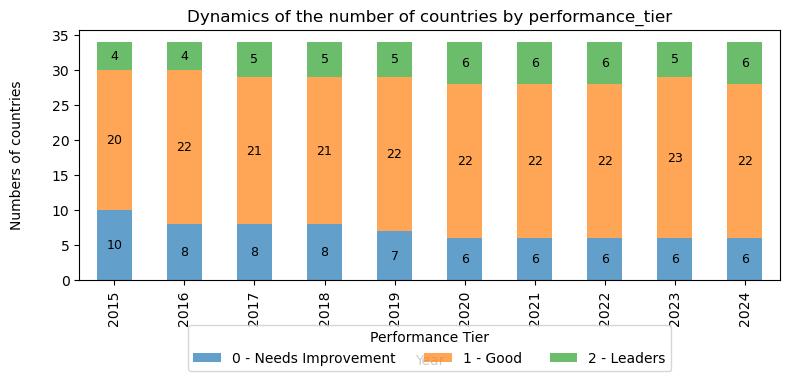

In [13]:
tier_labels = {
    0: "0 - Needs Improvement",
    1: "1 - Good",
    2: "2 - Leaders"
}
pivot_table = df.groupby(["year", "performance_tier"]).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(8, 4))
bars = pivot_table.plot(kind="bar", stacked=True, ax=ax, alpha=0.7, zorder=1)

plt.title("Dynamics of the number of countries by performance_tier")
ax.legend(
    title="Performance Tier",
    labels=[tier_labels[col] for col in pivot_table.columns],
    loc="upper center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=3
)
plt.xlabel("Year", labelpad=20)
plt.ylabel("Numbers of countries", labelpad=20)

for container in bars.containers:
    ax.bar_label(container, label_type="center", fontsize=9, color="black")

plt.grid(False)
plt.tight_layout()
plt.show()

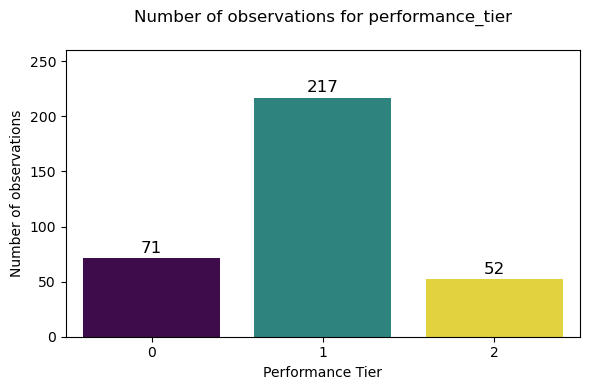

In [14]:
counts = df["performance_tier"].value_counts().sort_index()

plt.figure(figsize=(6, 4))
ax = sns.barplot(
    x=counts.index,
    y=counts.values,
    hue=counts.index,
    palette="viridis",
    legend=False
)

for i, v in enumerate(counts.values):
    ax.text(i, v + 2, str(v), ha="center", va="bottom", fontsize=12)

plt.xlabel("Performance Tier")
plt.ylabel("Number of observations")
plt.title("Number of observations for performance_tier", pad=20)

ax.set_ylim(0, counts.max() * 1.20) 
plt.tight_layout()
plt.show()

---

#### What distinguishes "Sustainability Leaders" from "Needs Improvement" countries? 

To answer this question, we will analyze the mean values of the factor variables, and, using box plots, we will further explore the distribution of these factors by examining their range, quartiles, median values, and the presence of outliers across the performance tiers.

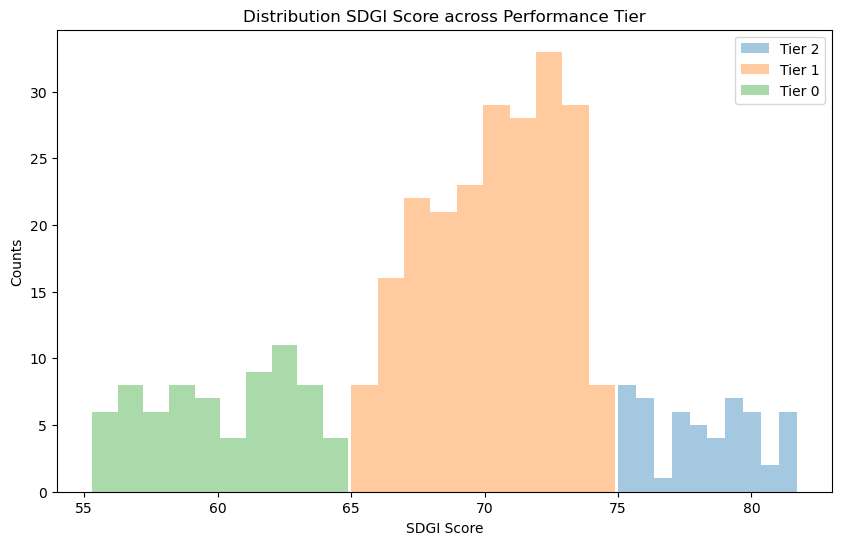

In [15]:
plt.figure(figsize=(10, 6))

for tier in df['performance_tier'].unique():
    subset = df[df['performance_tier'] == tier]
    
    plt.hist(subset['sdgi_score'], 
             bins=10, 
             density=False,  
             alpha=0.4, 
             label=f'Tier {tier}')
    
plt.xlabel("SDGI Score")
plt.ylabel("Counts")
plt.title("Distribution SDGI Score across Performance Tier")
plt.legend()
plt.show()

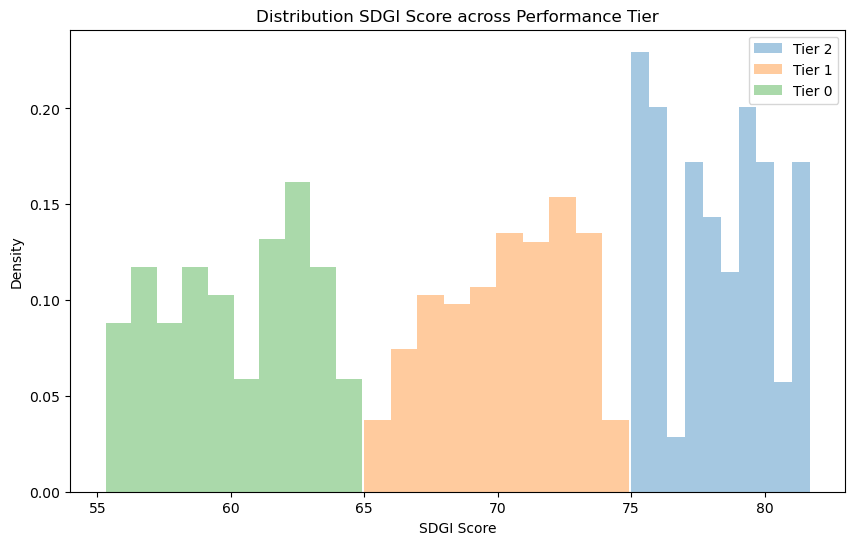

In [16]:
plt.figure(figsize=(10, 6))

for tier in df['performance_tier'].unique():
    subset = df[df['performance_tier'] == tier]
    
    plt.hist(subset['sdgi_score'], 
             bins=10, 
             density=True,  
             alpha=0.4, 
             label=f'Tier {tier}')
    
plt.xlabel("SDGI Score")
plt.ylabel("Density")
plt.title("Distribution SDGI Score across Performance Tier")
plt.legend()
plt.show()

- **Tier 0**  
    - **SDGI range:** 55–65  
    - **Distribution:** relatively uniform, with visible subgroups
    - **Characteristics:** countries with significant gaps in achieving the Sustainable Development Goals 

- **Tier 1**  
    - **SDGI range:** 65–75 (peak at 70–72)  
    - **Distribution:** bell-shaped, countries are relatively similar  
    - **Characteristics:** stable middle-level progress  

- **Tier 2**  
    - **SDGI range:** 75–82  
    - **Distribution:** less smooth due to fewer countries  
    - **Characteristics:** leaders, close to achieving most Sustainable Development Goals

In [17]:
num_cols = df.select_dtypes("number").columns.drop(["year", "performance_tier"])
means = df.groupby("performance_tier")[num_cols].mean().T
print("\nMean values of features across performance_tier :\n", means)


Mean values of features across performance_tier :
 performance_tier             0             1             2
sdgi_score           60.191549     70.412442     78.146154
sdg8_income       15438.661972  22042.599078  26995.211538
sdg8_unemp           10.915493      6.718894      6.019231
sdg8_inwork          10.521127      8.027650      6.192308
sdg9_eurd             0.732394      1.622120      2.865385
sdg9_digital         38.211268     59.649770     69.711538
sdg9_bband           80.295775     89.631336     94.134615
sdg16_cpi            44.943662     64.958525     83.461538
sdg16_rsf            67.028169     79.682028     88.846154
sdg16_crime          11.323944      9.552995      8.288462
sdg4_tertiary        38.267606     43.608295     45.288462
sdg4_adult            4.718310     12.677419     23.365385
sdg7_eurenew         21.338028     25.414747     46.692308
sdg13_co2gcp          5.399014      6.705714      6.376346
sdg5_empgap          17.507042      9.682028      5.500000
sdg1


Box plots for features with highest correlation:



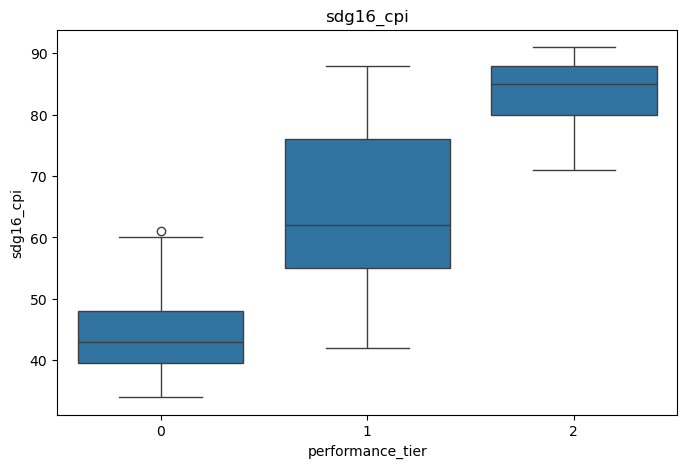

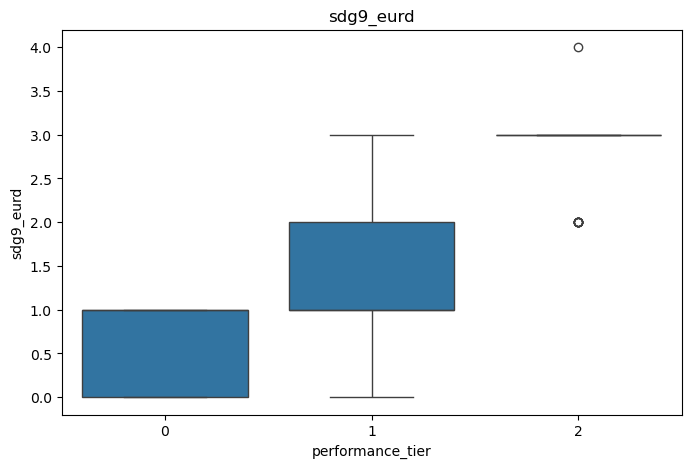

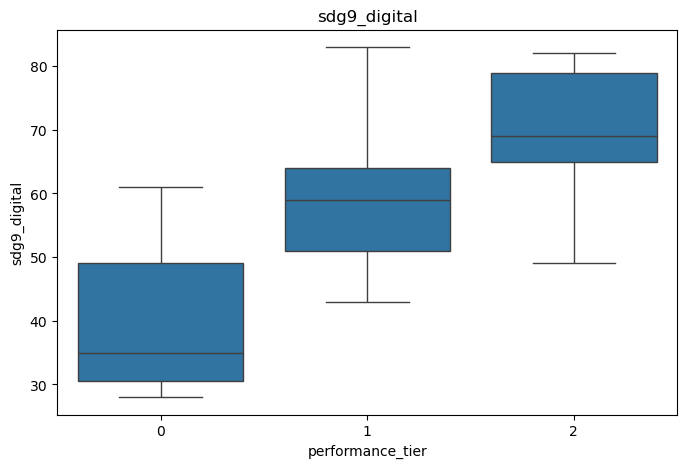

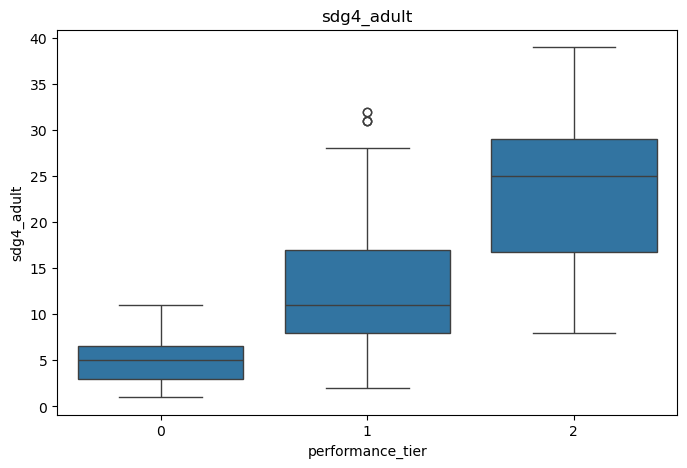

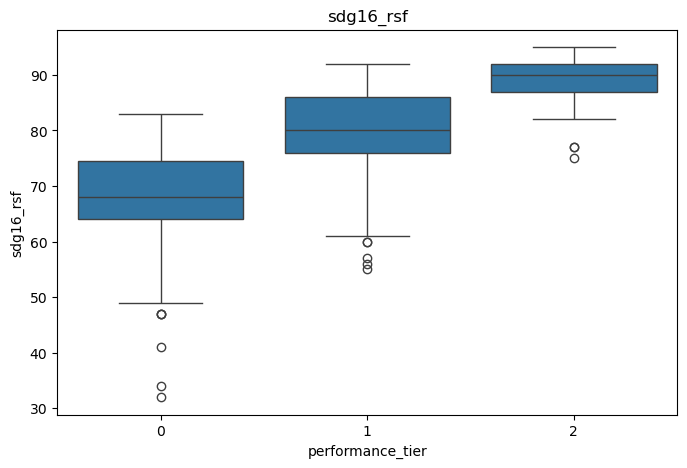

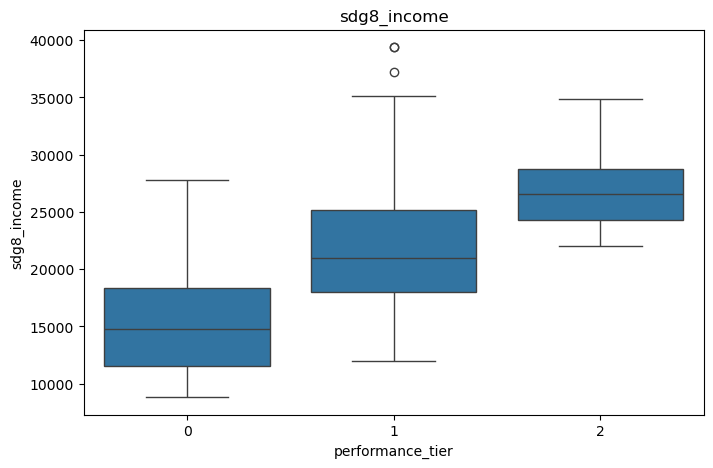

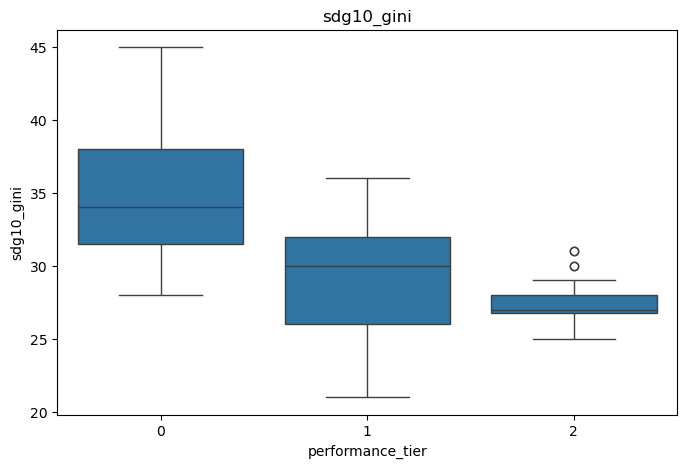

In [18]:
print("\nBox plots for features with highest correlation:\n")
for var in ["sdg16_cpi", "sdg9_eurd", "sdg9_digital", "sdg4_adult", "sdg16_rsf", "sdg8_income", "sdg10_gini"]:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df, x="performance_tier", y=var)
    plt.title(var)
    plt.show()

---
#### Connecting the Dots: Scatter Plots

We will analyze the distribution of the SDGI Score depending on each individual factor, overlaying performance tier labels on the plots. 

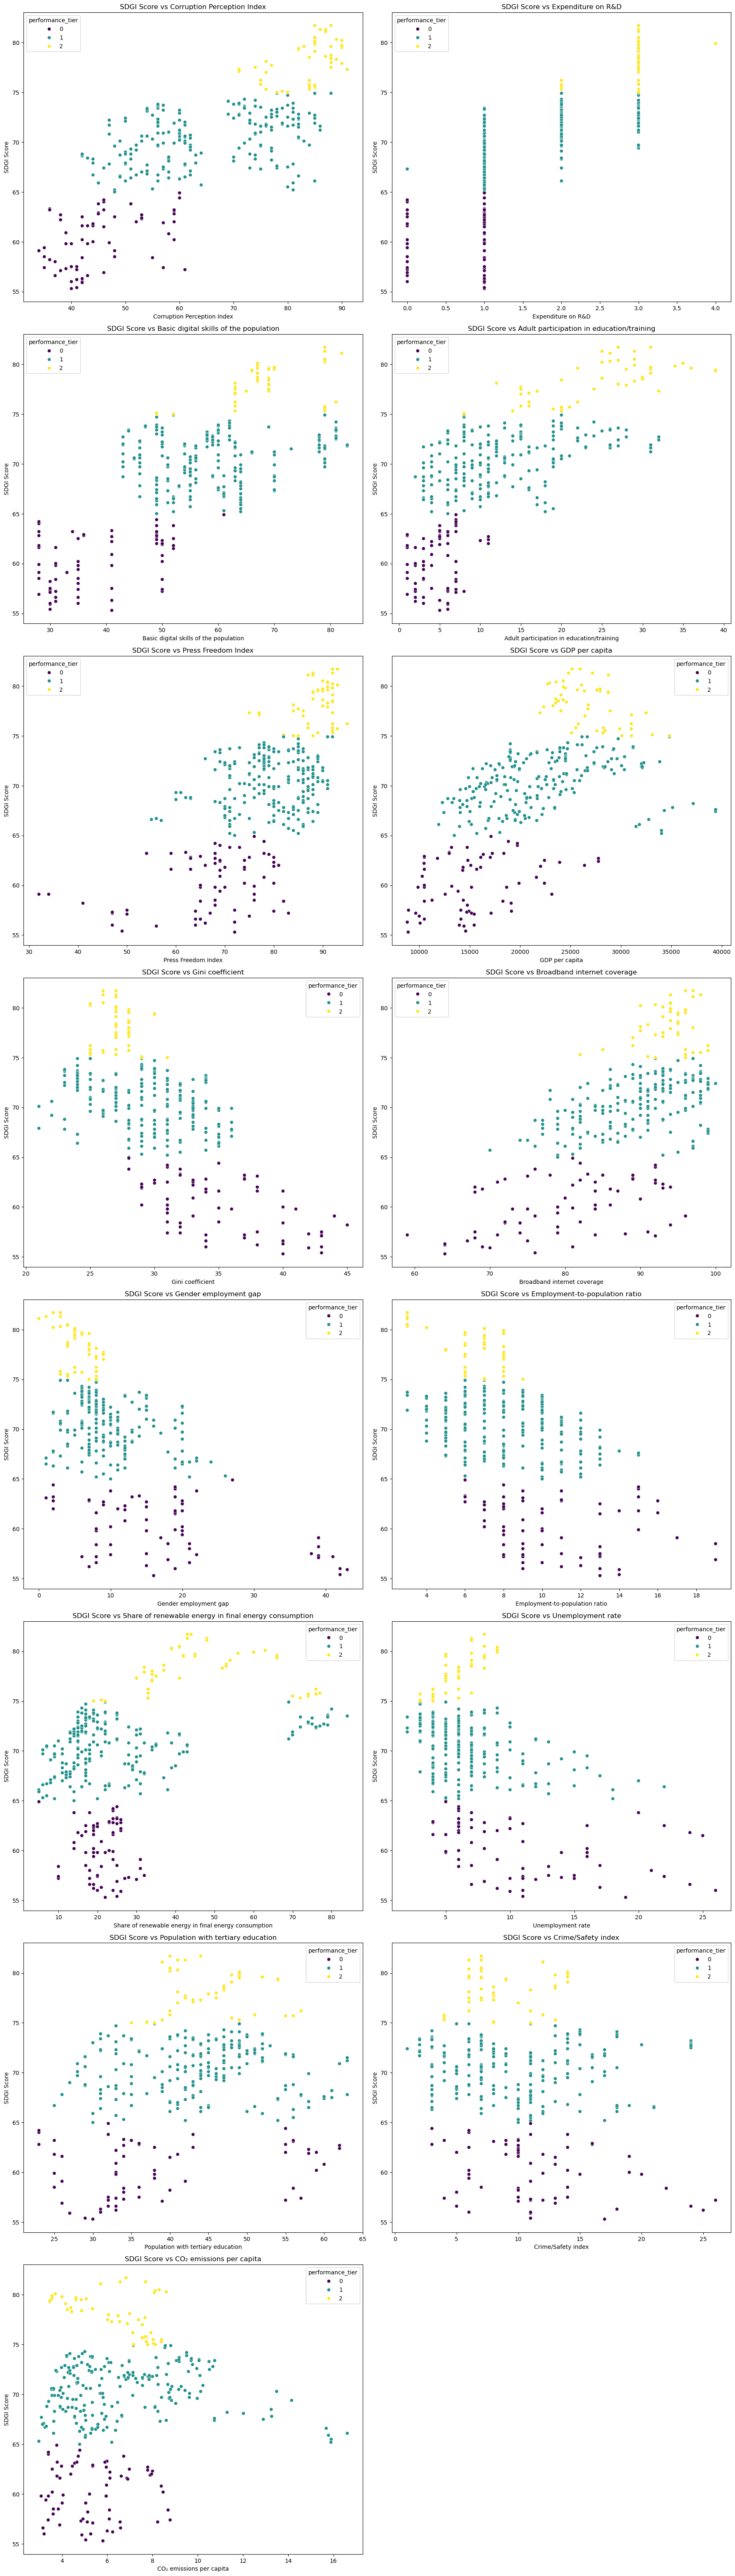

In [19]:
x_vars = {
    "sdg16_cpi": "Corruption Perception Index",
    "sdg9_eurd": "Expenditure on R&D",
    "sdg9_digital": "Basic digital skills of the population",
    "sdg4_adult": "Adult participation in education/training",
    "sdg16_rsf": "Press Freedom Index",
    "sdg8_income": "GDP per capita",
    "sdg10_gini": "Gini coefficient",
    "sdg9_bband": "Broadband internet coverage",
    "sdg5_empgap": "Gender employment gap",
    "sdg8_inwork": "Employment-to-population ratio",
    "sdg7_eurenew": "Share of renewable energy in final energy consumption",
    "sdg8_unemp": "Unemployment rate",
    "sdg4_tertiary": "Population with tertiary education",
    "sdg16_crime": "Crime/Safety index",
    "sdg13_co2gcp": "CO₂ emissions per capita"
}  
#I ranked these features according to their correlation coefficients in the next section

fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(18, 70))
axes = axes.flatten()

for i, (col, label) in enumerate(x_vars.items()):
    sns.scatterplot(
        data=df,
        x=col,
        y="sdgi_score",
        hue="performance_tier",
        palette="viridis",
        ax=axes[i]
    )
    axes[i].set_xlabel(label)
    axes[i].set_ylabel("SDGI Score")
    axes[i].set_title(f"SDGI Score vs {label}")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Tier 0 — "Needs Improvement"**  
Tend to cluster at the **low end** (or problematic range) of most indicators:  

- **Corruption (CPI):** ~30–50  
- **R&D expenditure:** <0.5% of GDP 
- **Digital skills:** <40%   
- **Adult training:** <10%  
- **Press freedom:** ~30–55  
- **Income per capita (PPP):** €9k–15k  
- **Inequality (Gini):** 35–45  
- **Broadband coverage:** <70%  
- **Gender employment gap:** >20 pp  
- **Unemployment:** >15%  
- **Employment-to-population ratio:** <8%  
- **Renewables share:** <20%  
- **Tertiary education:** <30%  
- **Crime index:** >18  
- **CO₂ emissions per capita:** 8–16 t  

These countries face **systemic barriers** across nearly all dimensions.  

**Tier 1 — "Good Performers"**  
Positioned in the **middle ranges** of most indicators:  

- **Corruption (CPI):** ~50–70  
- **R&D expenditure:** 0.5–1.5%  
- **Digital skills:** 50–65%  
- **Adult training:** 10–20%  
- **Press freedom:** 55–75  
- **Income per capita (PPP):** €15k–25k  
- **Inequality (Gini):** 30–35  
- **Broadband coverage:** 70–90%  
- **Gender employment gap:** 10–20 pp  
- **Unemployment:** 7–15%  
- **Employment-to-population ratio:** 8–12%  
- **Renewables share:** 20–40%  
- **Tertiary education:** 30–45%  
- **Crime index:** 10–18  
- **CO₂ emissions per capita:** 6–10 t  

Progress is visible, but Tier 1 countries risk **stagnation** if they do not address governance, inequality, and innovation gaps.  

**Tier 2 — "Leaders"**  
Consistently found at the **upper-right quadrants**:  

- **Corruption (CPI):** >70 
- **R&D expenditure:** >2% of GDP
- **Digital skills:** >65%
- **Adult training:** >20%
- **Press freedom:** >75  
- **Income per capita (PPP):** >€25k  
- **Inequality (Gini):** 22–30  
- **Broadband coverage:** >90%  
- **Gender employment gap:** <10 pp  
- **Unemployment:** <7%  
- **Employment-to-population ratio:** >12%  
- **Renewables share:** >40%  
- **Tertiary education:** >45%  
- **Crime index:** <10  
- **CO₂ emissions per capita:** 3–6 t

These countries show how **institutional quality, innovation, human capital, and sustainability policies** translate into high SDGI 
outcomes. 

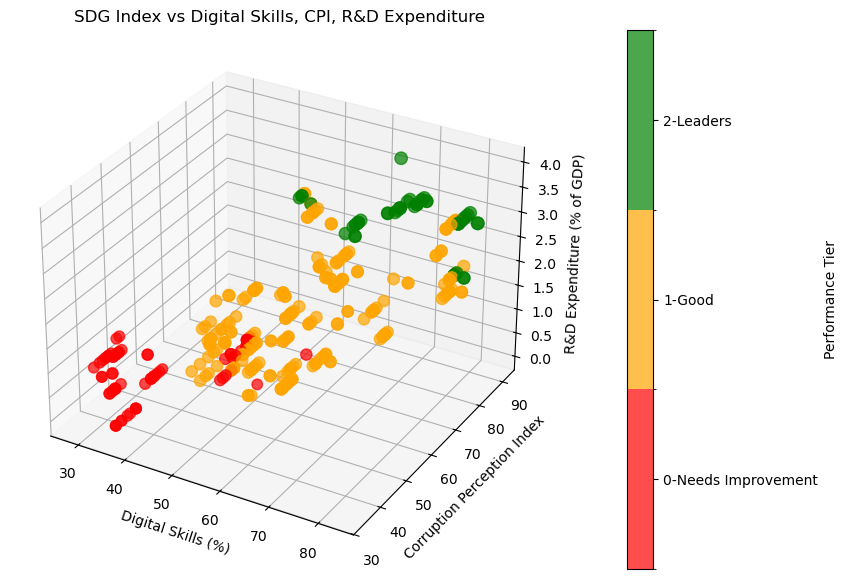

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np

# Variables
x = df['sdg9_digital']
y = df['sdg16_cpi']
z = df['sdg9_eurd']
score = df['sdgi_score']
tier = df['performance_tier']  # 0,1,2

# figure creating
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Discrete color map
cmap = ListedColormap(["red", "orange", "green"])
bounds = np.arange(-0.5, 3, 1) 
norm = BoundaryNorm(bounds, cmap.N)

# Dots
sc = ax.scatter(x, y, z,
                c=tier,
                cmap=cmap,
                norm=norm,
                s=score,
                alpha=0.7)

# Labels
ax.set_xlabel("Digital Skills (%)")
ax.set_ylabel("Corruption Perception Index")
ax.set_zlabel("R&D Expenditure (% of GDP)")

# Legend
cbar = plt.colorbar(sc, ax=ax, pad=0.1, ticks=[0, 1, 2])
cbar.ax.set_yticklabels(["0-Needs Improvement", "1-Good", "2-Leaders"])
cbar.set_label("Performance Tier")

plt.title("SDG Index vs Digital Skills, CPI, R&D Expenditure")
plt.show()

---

#### KDE — what sort of creature is this, and how do you deal with it?

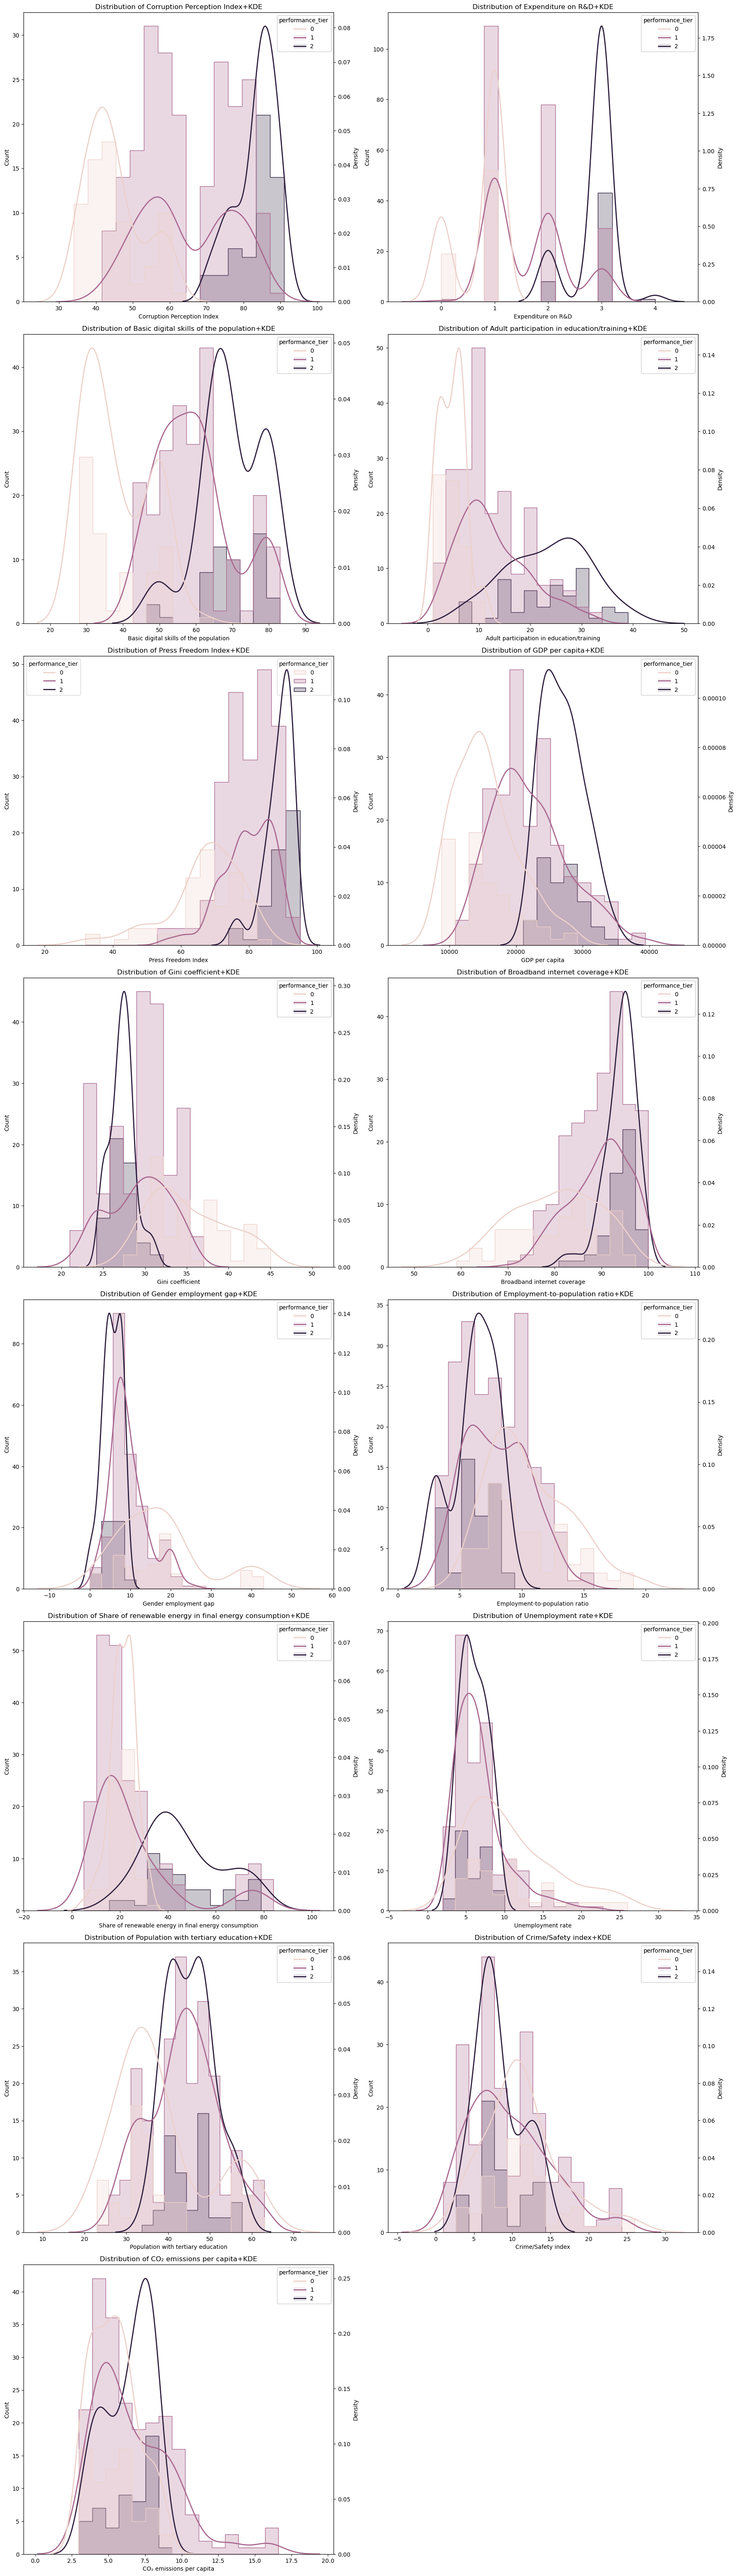

In [20]:
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(18, 70))
axes = axes.flatten()

for i, (col, label) in enumerate(x_vars.items()):
    ax1 = axes[i]

    sns.histplot(
        data=df,
        x=col,
        bins=15,
        hue="performance_tier",
        element="step",
        stat="count",
        common_norm=False,
        ax=ax1
    )
    ax1.set_xlabel(label)
    ax1.set_ylabel("Count")

    ax2 = ax1.twinx()
    sns.kdeplot(
        data=df,
        x=col,
        hue="performance_tier",
        common_norm=False,
        lw=2,
        ax=ax2
    )
    ax2.set_ylabel("Density")

    ax1.set_title(f"Distribution of {label}+KDE")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<b>What new info we can find from KDE plots?</b>

Situation when we have <b>*two peaks*</b> on a KDE show us that countries within one Tier have <b>*“two different development trajectories”*</b> .  
This info can economically explains why some countries move toward the leaders, while others risk falling behind.  

<i><b>Two Peaks within one Tier</b></i>
- Countries in this tier are heterogeneous, and there are two subgroups with different characteristics.
  
- For example,  in Tier 1 we can see a peak around 0.8% R&D and another around 1.5% → some countries invest little in research, others much more.  
- Such a split may reflect <b>regional blocks</b> (e.g., Eastern Europe vs Western Europe) or <b>different development models</b> (industrially-oriented countries and countries, that actively develop an innovation sector).
- This is a signal that *Tier 1 is not a monolith* but a *“mixed class”*: some countries are potentially ready to move to Tier 2, while others lean toward Tier 0.

<b>*Other examples.*</b>

*Adult participation in education/training (sdg4_adult)*  
*Tier 1:* one peak around *10%* and another around *18–20%*.  
Some countries have a very weak culture of *lifelong learning*, while others already show higher levels of adult participation.  
This may explain the difference between *Southern* and *Northern Europe*.
  
*Gender employment gap (sdg5_empgap)*  
*Tier 1:* one peak around *12–13 %* and another around *18–20 %*.  
In some countries gender inequality in the labor market is already shrinking, while in others a large gap still remains.
   
*Tertiary education attainment (sdg4_tertiary)*  
*Tier 1:* one peak around *30–35%* and another around *40–45%*.  
This shows a split between countries with only *basic access* to higher education and those where higher education is more widespread.
  
*CO₂ emissions per capita (sdg13_co2gcp)*  
*Tier 1:* one peak around *7–8 t/person* and another around *10–11 t/person*.  
Some countries have already reduced emissions thanks to *green policies*, while others remain dependent on *fossil fuel–based energy*.  
</br>
</br>
This means that <b>policies</b> for such countries cannot be *“one size fits all.”* Segmentation is needed:  
- for *“stronger” Tier 1* countries → programs of innovation and green growth;  
- for *“weaker” Tier 1* countries → support for basic institutions and infrastructure.  


---

#### Pearson Correlation Coefficients for performance_tier: which features show the strongest correlations with performance_tier 

Based on the correlation analysis, it is possible to assess the degree of influence of individual factors on the target variable *performance_tier*.  
The most influential factors include:  

- **sdg16_cpi** – Corruption Perception Index (Transparency International)  
- **sdg9_eurd** – Expenditure on R&D  
- **sdg9_digital** – Basic digital skills of the population  
- **sdg4_adult** – Adult participation in education/training  
- **sdg16_rsf** – Press Freedom Index (Reporters Without Borders)  
- **sdg8_income** – Average income per capita (GDP per capita, PPP)  
- **sdg10_gini** – Gini coefficient (income inequality)  

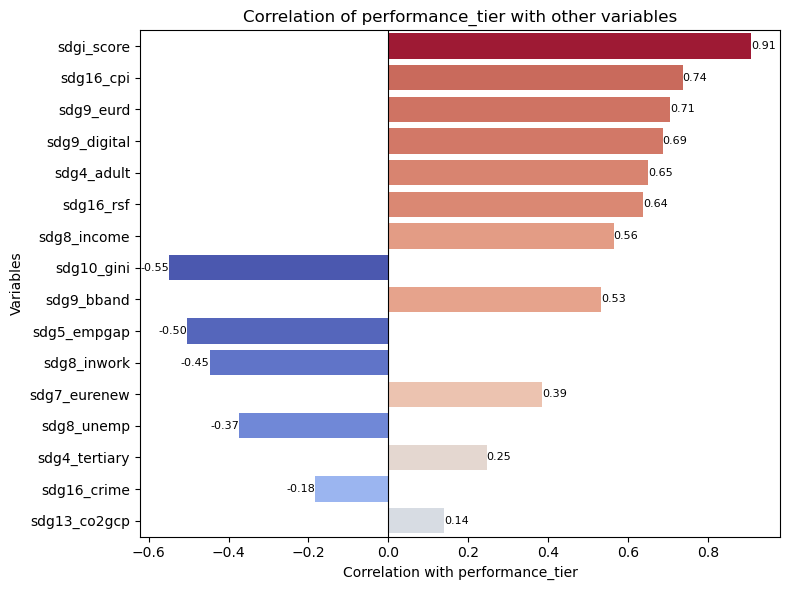

In [21]:

corr = df.corr(numeric_only=True)["performance_tier"].drop(["performance_tier", "year"])
corr = corr.reindex(corr.abs().sort_values(ascending=False).index)

plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x=corr.values,
    y=corr.index,
    hue=corr.values,
    palette="coolwarm",
    dodge=False,
    legend=False
)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=8)

plt.axvline(0, color="black", linewidth=0.8)
plt.xlabel("Correlation with performance_tier")
plt.ylabel("Variables")
plt.title("Correlation of performance_tier with other variables")
plt.tight_layout()
plt.show()

---

#### Are there clear patterns separating the three performance levels?
**Clear patterns separate the three performance levels.** 

Tier 0 -  "Needs Improvement" 

This level is marked by weak institutions, widespread corruption, and low public trust in government structures. Economies in this tier tend to have low income levels, high unemployment, and limited innovation capacity. Social outcomes are undermined by poor digital skills, restricted access to education, and significant gender gaps. Infrastructure is underdeveloped, broadband coverage remains weak, and environmental performance is burdened by high CO₂ emissions and a low share of renewables.

Tier 1 - "Good" 

This is a transitional stage where countries display mixed results: some indicators show progress, while others remain fragile. A bimodal pattern emerges — certain countries are moving closer to innovation, inclusion, and ecological resilience, while others still resemble Tier 0. Institutional development and digital skills improve unevenly, and reductions in social and economic inequality are modest. It represents a “crossroads,” where future trajectories depend on whether countries converge toward leaders or fall back into the development trap.

Tier 2 - "Leaders" 

This tier is distinguished by strong institutions, low levels of corruption, and high respect for the rule of law. Economies achieve high income, invest significantly in R&D, and sustain low unemployment. The social dimension is characterized by advanced digital skills, broad access to education, and active inclusion of all groups regardless of gender. Infrastructure and broadband coverage are nearly universal, while environmental policies support renewable energy expansion and reductions in CO₂ emissions.





## Part 2. Model Training and Evaluation
### 2.1. Logistic Regression

**Model Building Workflow**
1. **Feature Selection**  
   - y = `performance_tier`  
   - X = all features except: `performance_tier`, `sdgi_score`, `Country`, `year`
2. **Train/Test Split**
   - split with proportion 70%:30%
   - use `stratify=y` (performance_tiers are not proportional)
3. **Pipeline**  
   - use `StandardScaler` for normalization, because now all features have different scales   
   - use model `LogisticRegression` with `max_iter=1000`
   - combine in one pipeline
4. **Hyperparameter Tuning (GridSearchCV)**  
   - tuning with the following parameter grid:  
       - `C` (regularization strength): `[0.01, 0.1, 1, 10]`,
       - `penalty`: `[l1, l2]`, l1 - "Lasso" penalty with feature selection,  l2 - "Rigde" penalty without feature selection
       - methods of optimisation `solver`: `[liblinear, saga]`, they can work with l1 and 22  
   - use 5-fold cross-validation (`cv=5`)  
   - metric for model selection: `f1_weighted`
   - fit on training set  
5. **Evaluation on Test Set**  
   - compute: `accuracy`, `f1_weighted`, `confusion_matrix`, `classification_report` 
   - record `best_params_` and `best_score_` from CV
6. **Interpretation**  
   - extract coefficients: `log_reg.coef_` 
   - compute feature importance: mean absolute coefficients across performance_tier
   - present Top-10 features and a coefficient table by tiers
   - bild plots with the most influential factors across tiers


Best params:
 {'log_reg__C': 1, 'log_reg__penalty': 'l1', 'log_reg__solver': 'saga'}
Best CV score (mean F1_weighted over 5 folds): 0.9027785220273609

Test set performance
Accuracy: 0.8921568627450981
F1 (weighted): 0.8948817433210615

Confusion matrix:
 [[19  2  0]
 [ 1 58  6]
 [ 0  2 14]]

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.94      0.89      0.91        65
           2       0.70      0.88      0.78        16

    accuracy                           0.89       102
   macro avg       0.86      0.89      0.87       102
weighted avg       0.90      0.89      0.89       102


The most important features, Logistic Regression:
sdg9_eurd        1.154090
sdg9_digital     1.015920
sdg16_cpi        1.005246
sdg4_tertiary    0.675796
sdg5_empgap      0.654101
sdg16_crime      0.547382
sdg16_rsf        0.541885
sdg8_income      0.462407
sdg10_gini       0.355637
sdg9_bband     

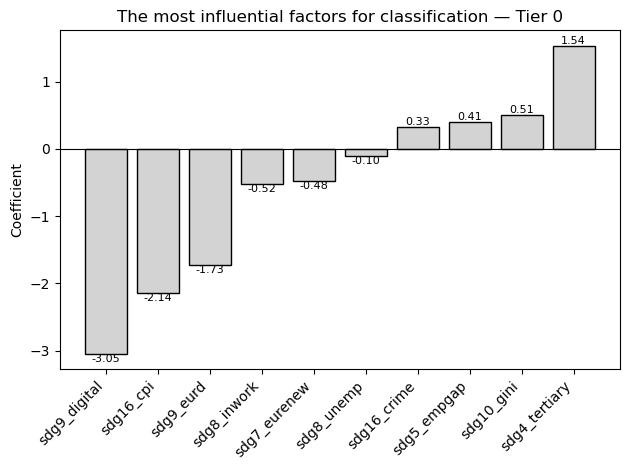

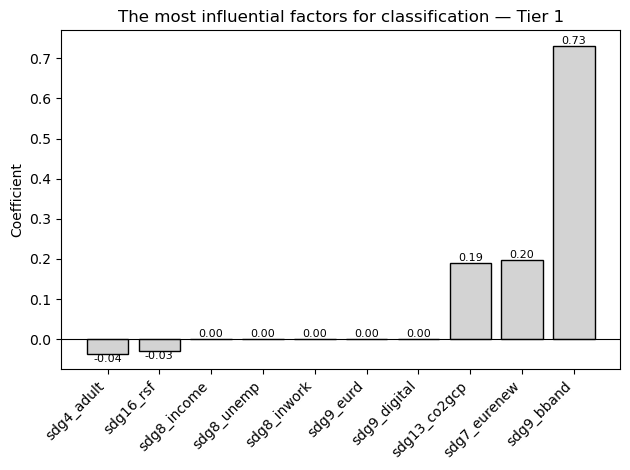

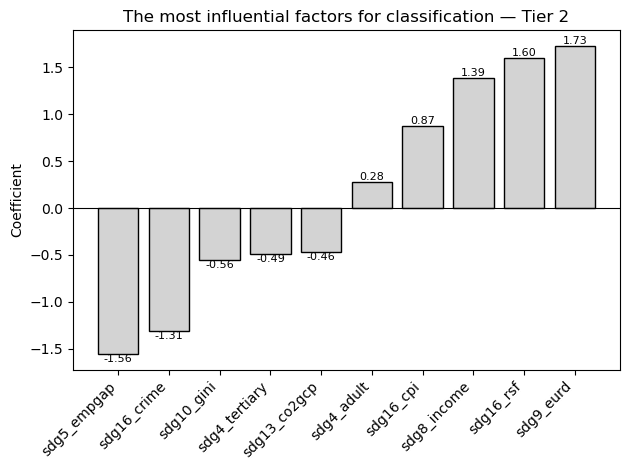

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

#1. Feature Selection
X = df.drop(["performance_tier", "sdgi_score", "Country", "year"], axis=1)
y = df["performance_tier"]

#2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

#3. Pipeline
pipe = Pipeline([
    ("scaler", StandardScaler()), #normalisation/scaling
    ("log_reg", LogisticRegression(max_iter=1000))
])

#4. Hyperparameter Tuning
#dictionary of hyperparameters for GridSearchCV
param_grid = {
    "log_reg__C": [0.01, 0.1, 1, 10],
    "log_reg__penalty": ["l1", "l2"],
    "log_reg__solver": ["liblinear", "saga"]  
}
#cross-validation
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1,  #for faster processing
    refit=True
)
#fit on training set
grid.fit(X_train, y_train)

#5. Evaluation on Test Set
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

f1_weighted = metrics.f1_score(y_test, y_pred, average="weighted")
accuracy = metrics.accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\nBest params:\n", grid.best_params_)
print("Best CV score (mean F1_weighted over 5 folds):", grid.best_score_)

print("\nTest set performance")
print("Accuracy:", accuracy)
print("F1 (weighted):", f1_weighted)
print("\nConfusion matrix:\n", cm)
print("\nClassification report:\n", report)

# 6. Interpretation
logreg = best_model.named_steps["log_reg"]
coef = logreg.coef_
feature_names = X.columns

importance = np.mean(np.abs(coef), axis=0)
importances = pd.Series(importance, index=feature_names).sort_values(ascending=False)

print("\nThe most important features, Logistic Regression:")
print(importances.head(10))

coef_df = pd.DataFrame(logreg.coef_, columns=feature_names, index=logreg.classes_)
print("\nCoefficients for each performance_tier, Logistic Regression:")
print(coef_df.T.sort_values(by=logreg.classes_[0], ascending=False))

# Plots - Lasso coefficiens
cdf = coef_df.T

def plot_top_features(series, tier_label, top_n=10):
    s = series.abs().sort_values(ascending=False).head(top_n)
    s = series[s.index].sort_values()
    
    bars = plt.bar(range(len(s)), s.values, color="lightgray", edgecolor="black")
    plt.axhline(0, color="black", linewidth=0.8)
    plt.xticks(range(len(s)), s.index, rotation=45, ha="right")
    plt.title(f"The most influential factors for classification — Tier {tier_label}")
    plt.ylabel("Coefficient")
    
    for bar, val in zip(bars, s.values):
        plt.text(bar.get_x() + bar.get_width()/2, val, f"{val:.2f}",
        ha="center", va="bottom" if val >= 0 else "top", fontsize=8)
    
    plt.tight_layout()
    plt.show()

for tier in cdf.columns:
    plot_top_features(cdf[tier], tier, 10)

ROC AUC OvR (macro):    0.9772723042372052
ROC AUC OvR (weighted): 0.9714963101116012
ROC AUC OvO (macro):    0.9808226495726496
ROC AUC OvO (weighted): 0.9766536261940674


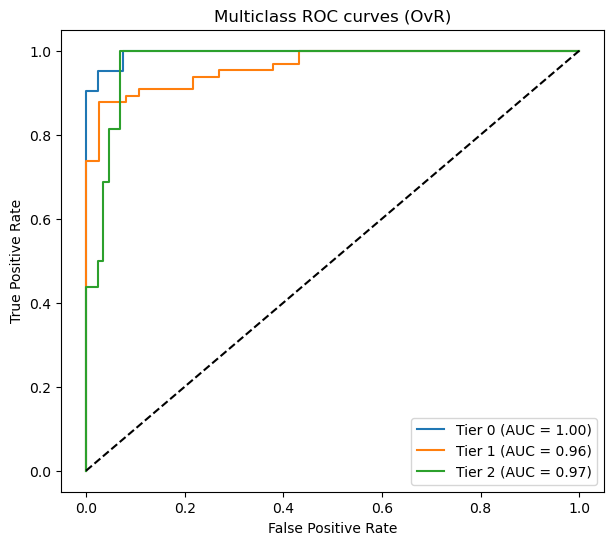

In [25]:
# Receiver Operating Characteristic (ROC) and Area Under Curve (AUC)
# Used to estimate how well the model separates True Positive Rate (TPR) from False Positive Rate (FPR)
# actual for multiclass classification (tier 0,1,2)

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

#predicted probability of each class (tier)
y_pred_probs = grid.best_estimator_.predict_proba(X_test)

# multiclass ROC:
# One-vs-Rest  (OvR) one class/tier vs. all other classes
roc_auc_macro = roc_auc_score(y_test, y_pred_probs, multi_class="ovr", average="macro")
roc_auc_weighted = roc_auc_score(y_test, y_pred_probs, multi_class="ovr", average="weighted")
# One-vs-One (OvO) classification — all class pairs
roc_auc_macro_ovo = roc_auc_score(y_test, y_pred_probs, multi_class="ovo", average="macro")
roc_auc_weighted_ovo = roc_auc_score(y_test, y_pred_probs, multi_class="ovo", average="weighted")

print("ROC AUC OvR (macro):   ", roc_auc_macro)
print("ROC AUC OvR (weighted):", roc_auc_weighted)
print("ROC AUC OvO (macro):   ", roc_auc_macro_ovo)
print("ROC AUC OvO (weighted):", roc_auc_weighted_ovo)

y_test_bin = label_binarize(y_test, classes=grid.best_estimator_.classes_)
y_pred_probs = grid.best_estimator_.predict_proba(X_test)

# multiclass ROC-AUC plot:
plt.figure(figsize=(7, 6))
for i, cls in enumerate(grid.best_estimator_.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Tier {cls} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC curves (OvR)")
plt.legend(loc="lower right")
plt.show()

**The logistic regression model with the optimal parameters**:
`{'log_reg__C': 1, 
'log_reg__penalty': 'l1',
'log_reg__solver': 'saga'}`  

**Cross-validation (5 folds, F1-weighted):** 0.903  
**Test set:**  
  - Accuracy: 0.892  
  - F1 (weighted): 0.895

The difference between Cross-validation F1-weighted (0,903) and Test F1-weighted (0.895) is very small (~0.008), which indicates good consistency between the training and test sets. This means that the model has not "memorized" the data too much and generalizes relatively well. These results suggest that the model **does not exhibit overfitting**.

The obtained model uses **L1-regularization (Lasso)**, which already helps mitigate overfitting by shrinking less important coefficients to zero.

ROC AUC analysis shows that the model can distinguish between the positive and negative classes with high accuracy. If we randomly pick one positive and one negative sample, there is a 97–98% chance that the model assigns a higher probability to the positive one.

**Error analysis**
|    |    |    |    
|----|----|----|
| 19 |  2 |  0 |
|  1 | 58 |  6 |
|  0 |  2 | 14 

        precision    recall  f1-score   support

    0       0.95      0.90      0.93        21
    1       0.94      0.89      0.91        65
    2       0.70      0.88      0.78        16

- Tier **0 (Needs Improvement)** and **1 (Good Performers)** are well distinguished, with high precision and recall.  
- The main challenge remains with Tier **2 (Leaders):**  
  - Recall is high (0.88)  
  - Precision is lower (0.70)  
  - Some representatives of Tier 2 are misclassified as Tier 1.
- So, the Precision–Recall analysis shows that the model may perform poorly on rare class/tier 2. 

**Important features**

The use of L1-regularization (Lasso) makes it possible to evaluate variable importance based on the model’s coefficients.
The most influential factors for classification are: 
- **Innovation and digitalization:**  `sdg9_eurd`, `sdg9_digital`, `sdg9_bband`  
- **Governance and transparency:**   `sdg16_cpi`, `sdg16_rsf`, `sdg16_crime`  
- **Education and employment:**  `sdg4_tertiary`, `sdg5_empgap`, `sdg8_income`  
- **Socio-economic inequalities:**   `sdg10_gini`  

The model demonstrates stable and reliable performance  
(Accuracy ≈ **0.89**, weighted F1 ≈ **0.89**),  significantly exceeding the target threshold of **0.75**

### 2.2. Random Forest

**Model Building Workflow**

1. **Feature Selection**  
   - y = `performance_tier`.  
   - X = all features except: `performance_tier`, `sdgi_score`, `Country`, `year`.  
2. **Train/Test Split**  
   - split with proportion 70%:30%  
   - use `stratify=y` (performance_tiers are not proportional)
   - `random_state=42` for reproducibility  
3. **Pipeline**  
   - use `SimpleImputer(strategy="median")` as safeguard for missing values if we will have new data
   - use model `RandomForestClassifier(random_state=42, n_jobs=-1)`; n_jobs=-1 allowed to use all CPU cores for faster processing
   - combine in one pipeline  
4. **Hyperparameter Tuning (RandomizedSearchCV)**  
   - tuning with the following parameter distributions:  
       - number of trees in the Random Forest `n_estimators`: `randint(300, 1200)`, random value in this range
       - maximum depth of each tree `max_depth`: `randint(3, 50)`  
       - minimum number of samples required to split an internal node `min_samples_split`: `randint(2, 20)`  
       - minimum number of samples required to be at a leaf node `min_samples_leaf`: `randint(1, 10)`  
       - number of features to consider when looking for the best split `max_features`: `[sqrt, log2, None]`  
   - use 5-fold cross-validation (`cv=5`, `StratifiedKFold`)  
   - number of iterations: `n_iter=50`  
   - metric for model selection: `f1_weighted`
   - fit on training set
5. **Evaluation on Test Set**  
   - compute: `accuracy`, `f1_weighted`, `confusion_matrix`, `classification_report`  
   - record `best_params_` and `best_score_` from CV  
6. **Interpretation**  
   - extract feature importances: `rf.feature_importances_`  
   - present Top-10 most important features  

In [26]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from scipy.stats import randint

df = pd.read_csv("cleaned_data.csv")

# 1.  Feature Selection
X = df.drop(columns=["performance_tier", "sdgi_score", "Country", "year"], errors="ignore")
y = df["performance_tier"]

# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# 3. Pipeline
pipe_rf = Pipeline([
  #Data were already imputed during EDA, but I added SimpleImputer as a safeguard in case potential new data will contain missing values
    ("imp", SimpleImputer(strategy="median")),
    ("rf", RandomForestClassifier(random_state=42, n_jobs=-1))
])

# 4. Hyperparameter Tuning (RandomizedSearchCV)
# dictionary of parameter distributions for RandomForest
param_dist_rf = {
    "rf__n_estimators": randint(300, 1200), 
    "rf__max_depth": randint(3, 50),
    "rf__min_samples_split": randint(2, 20),
    "rf__min_samples_leaf": randint(1, 10),
    "rf__max_features": ["sqrt", "log2", None]
}
# cross-validation 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rs_rf = RandomizedSearchCV(
    pipe_rf,
    param_distributions=param_dist_rf,
    n_iter=50,
    cv=cv,
    scoring="f1_weighted",
    n_jobs=-1,
    random_state=42,
    refit=True
)
#fit on Train Set
rs_rf.fit(X_train, y_train)

# 5. Evaluation on Test Set
y_pred_rf = rs_rf.predict(X_test)
print("\nBest params:\n", rs_rf.best_params_)
print("\nCV best f1_weighted:\n", rs_rf.best_score_)
print("\nTest Accuracy:\n", accuracy_score(y_test, y_pred_rf))
print("\nTest F1 (weighted):\n", f1_score(y_test, y_pred_rf, average="weighted"))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification report:\n", classification_report(y_test, y_pred_rf))

# 6. Interpretation
best_model_rf = rs_rf.best_estimator_.named_steps["rf"]
importances = pd.Series(best_model_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nThe most importance features, RandomForest:")
print(importances.head(10))


Best params:
 {'rf__max_depth': 11, 'rf__max_features': None, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 5, 'rf__n_estimators': 900}

CV best f1_weighted:
 0.9418263191846211

Test Accuracy:
 0.9607843137254902

Test F1 (weighted):
 0.9600802729891631

Confusion matrix:
 [[18  3  0]
 [ 0 65  0]
 [ 0  1 15]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92        21
           1       0.94      1.00      0.97        65
           2       1.00      0.94      0.97        16

    accuracy                           0.96       102
   macro avg       0.98      0.93      0.95       102
weighted avg       0.96      0.96      0.96       102


The most importance features, RandomForest:
sdg9_digital     0.382087
sdg16_cpi        0.197545
sdg9_eurd        0.088927
sdg4_tertiary    0.064170
sdg7_eurenew     0.055871
sdg16_rsf        0.048062
sdg13_co2gcp     0.039375
sdg10_gini       0.039187
sdg9_bband       0.028

ROC AUC OvR (macro):    0.9878698397216916
ROC AUC OvR (weighted): 0.9826427734924468
ROC AUC OvO (macro):    0.9901022588522589
ROC AUC OvO (weighted): 0.9878397031889679


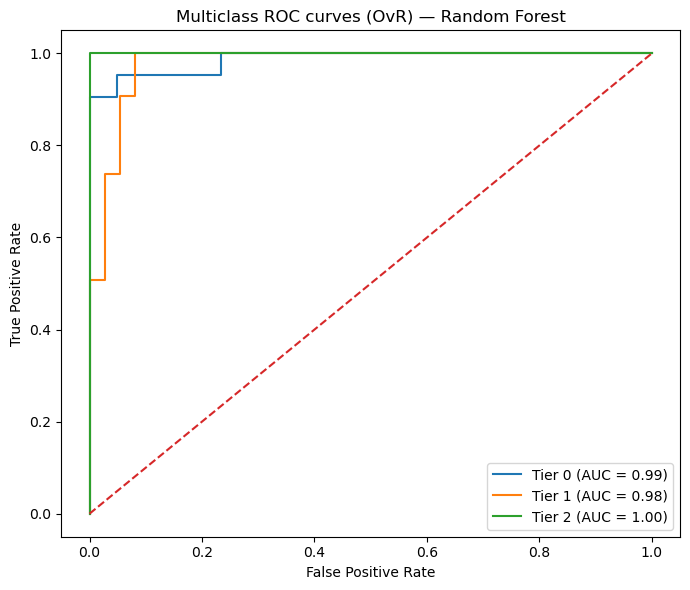

In [27]:
# Receiver Operating Characteristic (ROC) and Area Under Curve (AUC)

# Predicted probability of each class (tier) from the best Random Forest pipeline
# rs_rf —  RandomizedSearchCV in RandomForest (pipe_rf)
best_pipe = rs_rf.best_estimator_
y_pred_probs = best_pipe.predict_proba(X_test)          
classes = best_pipe.named_steps["rf"].classes_         

# Multiclass ROC-AUC
# One-vs-Rest (OvR): one class/tier vs. all other classes
roc_auc_ovr_macro    = roc_auc_score(y_test, y_pred_probs, multi_class="ovr", average="macro")
roc_auc_ovr_weighted = roc_auc_score(y_test, y_pred_probs, multi_class="ovr", average="weighted")

# One-vs-One (OvO): all class pairs
roc_auc_ovo_macro    = roc_auc_score(y_test, y_pred_probs, multi_class="ovo", average="macro")
roc_auc_ovo_weighted = roc_auc_score(y_test, y_pred_probs, multi_class="ovo", average="weighted")

print("ROC AUC OvR (macro):   ", roc_auc_ovr_macro)
print("ROC AUC OvR (weighted):", roc_auc_ovr_weighted)
print("ROC AUC OvO (macro):   ", roc_auc_ovo_macro)
print("ROC AUC OvO (weighted):", roc_auc_ovo_weighted)

# ROC curves (OvR) per class
y_test_bin = label_binarize(y_test, classes=classes)    

plt.figure(figsize=(7, 6))
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    cls_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Tier {cls} (AUC = {cls_auc:.2f})")


plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC curves (OvR) — Random Forest")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

---


### 2.3. Key questions 

#### 1. Which model performs best for multi-class classification?

**Random Forest** is the best for this task. With tuning it gives:  
- CV best f1_weighted: 0.94  
- Test Accuracy: 0.96  
- Test F1 (weighted): 0.96  

---

#### 2. What are the top 5 predictive features for sustainability performance?

Based on **feature importance (Random Forest):**  
- sdg9_digital → Basic digital skills of the population (% of population with basic digital skills)  
- sdg16_cpi → Corruption Perception Index (scale 0–100; higher = less corruption)  
- sdg9_eurd → Expenditure on R&D (% of GDP spent on research and development)  
- sdg4_tertiary → Population with tertiary education (% of adults with higher/tertiary education)  
- sdg7_eurenew → Share of renewable energy in final energy consumption (%)  

---

#### 3. Which tiers are most often confused with each other?

Based on **feature importance (Random Forest):**  
| Actual \ Predicted | Tier 0 (Needs Improvement) | Tier 1 (Good) | Tier 2 (Leaders) |
|--------------------|----------------------------|---------------|------------------|
| **Tier 0**         | 18                         | 3             | 0                |
| **Tier 1**         | 0                          | 65            | 0                |
| **Tier 2**         | 0                          | 1             | 15               |

- **Tier 0 (“Needs Improvement”)** → predicted correctly in most cases (18/21), with only 3 misclassified as Tier 1.  
- **Tier 1 (“Good”)** → absolutly correct (65/65).
- **Tier 2 (“Leaders”)** → mostly correct (15/16), but 1 were misclassified as Tier 1 (“Good”).
The most confusion occurs with Tier 0, which in 14.29% of cases is misclassified as Tier 1.
---

4. How confident can we be in our tier predictions? 
- **Logistic Regression** shows fairly high accuracy (Accuracy ≈0.89, F1 ≈0.89) and consistent cross-validation results (mean F1 ≈0.90). This indicates relatively stable prediction quality. The main uncertainty arises in distinguishing between the “Good” and “Leaders” tiers.

- **Random Forest** provides very high confidence in predictions (Accuracy ≈0.96, F1 ≈0.96, CV mean F1 ≈0.94). The model is stable across different folds and delivers almost error-free classification. This allows us to trust the predictions with a high degree of confidence.

## Part 3. Policy Insights and Use Case Documentation
### 3.1. Tier characterization

| Category | Tier 0 – "Needs Improvement" | Tier 1 – "Good" | Tier 2 – "Leaders" |
|----------|-------------------------------|-----------------|--------------------|
| **Institutional quality and governance** | High corruption, low press freedom, high crime → weak institutions. | Moderate corruption and governance; uneven progress in press freedom and safety. | Low corruption, strong rule of law, free press, safe environments. |
| **Economic structure and innovation** | Low income (€9k–15k PPP), minimal R&D (<0.5% GDP), high unemployment (>15%). | Middle-income (€15k–25k), moderate R&D (0.5–1.5%), unemployment 7–15%. | High income (>€25k), high R&D (>2%), low unemployment (<7%). |
| **Human capital and social inclusion** | Low digital skills (<40%), weak adult training (<10%), tertiary education <30%, large gender gaps (>20 pp). | Digital skills 50–65%, adult training 10–20%, tertiary education 30–45%, gender gap 10–20 pp. | High digital skills (>65%), adult training >20%, tertiary education >45%, gender gap <10 pp. |
| **Inequality and social balance** | High income inequality (Gini 35–45). | Moderate inequality (Gini 30–35). | Low inequality (Gini 22–30). |
| **Infrastructure and digitalization** | Broadband <70%. | Broadband 70–90%. | Broadband >90%. |
| **Environmental sustainability** | Low renewables (<20%), high CO₂ emissions (8–16 t). | Renewables 20–40%, CO₂ 6–10 t. | Renewables >40%, CO₂ 3–6 t. |
| **Distribution shapes (KDE insights)** | Peaks left for positive indicators, right/up for negatives. | Broader, sometimes bimodal peaks → heterogeneity within the group. Bimodality (R&D, adult training, gender gap, tertiary education, CO₂) shows Tier 1 is split into two subgroups: one closer to Tier 2, another leaning back toward Tier 0. | Clear right-shifts for positives, left-shifts for negatives → consolidated leaders. |
| **SDG Index** | • SDGI range: 55–65 <br> •  Сountries with significant gaps in achieving the SDGs | • SDGI range: 65–75 (peak at 70–72) <br> • Stable middle-level progress | • SDGI range: 75–82 <br> • Leaders, close to achieving most SDGs |
| **Economic interpretation** | Economies stuck in a development trap: weak institutions, low income, high inequality, poor innovation, high ecological footprint. | Economies at a crossroads: some advancing toward innovation and inclusion, others stagnating — explaining the bimodal distributions. | Economies with consolidated leadership: strong institutions, high innovation, inclusive labor markets, low inequality, and sustainable ecological policies. |
| **Summary** | Structurally constrained, high-risk economies. | Heterogeneous transitional group, with both “catch-up” and “lagging” trajectories. | Consolidated leaders combining prosperity, innovation, social inclusion, and sustainability. |


### 3.2. Policy recommendations
### 3.3. Country-specific insights
